<a href="https://colab.research.google.com/github/iamgirupashankar/Netflix-Content-Strategy-Analysis/blob/main/netflix_content_strategy_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Do Fundamental Analysis

Here is all the data you need:
"netflix_content_2023.csv"

## Data loading

### Subtask:
Load the Netflix content data from the provided CSV file into a pandas DataFrame.


**Reasoning**:
Load the Netflix data into a pandas DataFrame and display the first few rows.



In [1]:
import pandas as pd

try:
    df_netflix = pd.read_csv('netflix_content_2023.csv')
    display(df_netflix.head())
except FileNotFoundError:
    print("Error: 'netflix_content_2023.csv' not found. Please ensure the file exists in the current directory.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


## Data exploration

### Subtask:
Explore the loaded Netflix dataset to understand its characteristics.


**Reasoning**:
Examine the shape, data types, missing values, and distributions of key categorical variables in the DataFrame.



In [2]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df_netflix.shape)

# Display the data types of each column
print("\nData Types:\n", df_netflix.dtypes)

# Check for missing values
missing_values = df_netflix.isnull().sum()
missing_percentage = (missing_values / len(df_netflix)) * 100
print("\nMissing Values:\n", missing_values)
print("\nPercentage of Missing Values:\n", missing_percentage)

# Analyze the distribution of key categorical variables
categorical_cols = ['type', 'rating', 'country']
for col in categorical_cols:
    if col in df_netflix.columns:
        print(f"\nDistribution of '{col}':\n{df_netflix[col].value_counts()}")
    else:
        print(f"\nColumn '{col}' not found in the DataFrame.")

# Analyze the distribution of release years
if 'release_year' in df_netflix.columns:
    print(f"\nDistribution of 'release_year':\n{df_netflix['release_year'].value_counts()}")
else:
    try:
        df_netflix['release_year'] = pd.to_datetime(df_netflix['Release Date']).dt.year
        print(f"\nDistribution of 'release_year':\n{df_netflix['release_year'].value_counts()}")
    except (KeyError, pd.errors.ParserError) as e:
        print(f"\nError extracting or analyzing release year: {e}")

Shape of the DataFrame: (24812, 6)

Data Types:
 Title                  object
Available Globally?    object
Release Date           object
Hours Viewed           object
Language Indicator     object
Content Type           object
dtype: object

Missing Values:
 Title                      0
Available Globally?        0
Release Date           16646
Hours Viewed               0
Language Indicator         0
Content Type               0
dtype: int64

Percentage of Missing Values:
 Title                   0.000000
Available Globally?     0.000000
Release Date           67.088506
Hours Viewed            0.000000
Language Indicator      0.000000
Content Type            0.000000
dtype: float64

Column 'type' not found in the DataFrame.

Column 'rating' not found in the DataFrame.

Column 'country' not found in the DataFrame.

Distribution of 'release_year':
release_year
2022.0    1550
2021.0    1283
2020.0    1256
2019.0    1144
2018.0     974
2023.0     786
2017.0     596
2016.0     336
2015.0 

## Data cleaning

### Subtask:
Clean the Netflix dataset by handling missing values and inconsistencies.


**Reasoning**:
Clean the data by handling missing values, duplicates, and inconsistencies as per the instructions.



In [3]:
# 1. Handle missing 'Release Date'
# Since a large percentage of 'Release Date' values are missing (67.09%), removing rows with missing values is the safest option.
# Imputation could introduce bias due to the significant amount of missing data.
df_netflix.dropna(subset=['Release Date'], inplace=True)

# 2. Handle duplicate rows
# Check for duplicates and remove them
duplicate_rows = df_netflix[df_netflix.duplicated()]
if not duplicate_rows.empty:
    df_netflix.drop_duplicates(inplace=True)
    print(f"Removed {len(duplicate_rows)} duplicate rows.")
else:
    print("No duplicate rows found.")

# 3. Check for inconsistencies in categorical columns
# Standardize 'Available Globally?' column
df_netflix['Available Globally?'] = df_netflix['Available Globally?'].str.strip().str.lower()

# Standardize 'Content Type' column
df_netflix['Content Type'] = df_netflix['Content Type'].str.strip().str.lower()

# 4. Consider removing irrelevant columns
# 'Hours Viewed' and 'Language Indicator' columns are kept as they are important for analysis.
# No other columns seem irrelevant at this point.

# Display the cleaned DataFrame
display(df_netflix.head())

Removed 191 duplicate rows.


,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,release_year
0,The Night Agent: Season 1,yes,2023-03-23,"81,21,00,000",English,show,2023.0
1,Ginny & Georgia: Season 2,yes,2023-01-05,"66,51,00,000",English,show,2023.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,yes,2022-12-30,"62,28,00,000",Korean,show,2022.0
3,Wednesday: Season 1,yes,2022-11-23,"50,77,00,000",English,show,2022.0
4,Queen Charlotte: A Bridgerton Story,yes,2023-05-04,"50,30,00,000",English,movie,2023.0


## Data wrangling

### Subtask:
Create new features from existing ones in the cleaned Netflix dataset.


**Reasoning**:
Create new features 'duration' and 'primary_genre' based on existing columns.  Handle 'Hours Viewed' conversion and potential missing values in 'listed_in'.



In [4]:
import pandas as pd
import numpy as np

# 2. Create 'duration' feature from 'Hours Viewed'
# Convert 'Hours Viewed' to numeric, handling non-numeric values
df_netflix['duration'] = pd.to_numeric(df_netflix['Hours Viewed'].str.replace(',', ''), errors='coerce')
# Fill NaN values with 0 (or another appropriate value if needed).
df_netflix['duration'].fillna(0, inplace=True)


# 3. Create 'primary_genre' if 'listed_in' exists
if 'listed_in' in df_netflix.columns:
    df_netflix['primary_genre'] = df_netflix['listed_in'].str.split(',').str[0].str.strip()
else:
    print("'listed_in' column not found. Skipping primary_genre creation.")

# 4. Categorize release years (Example)
# Define bins for release years
bins = [2010, 2015, 2020, 2025]
labels = ['2010-2015', '2016-2020', '2021-2025']

# Create the 'release_year_bin' column
df_netflix['release_year_bin'] = pd.cut(df_netflix['release_year'], bins=bins, labels=labels, right=False)

#Combine 'Available Globally?' and 'country'
# Rationale: Analyze global availability of content within each country.

# Display the updated DataFrame
display(df_netflix.head())

'listed_in' column not found. Skipping primary_genre creation.


<ipython-input-4-ee3302309108>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_netflix['duration'].fillna(0, inplace=True)


,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,release_year,duration,release_year_bin
0,The Night Agent: Season 1,yes,2023-03-23,"81,21,00,000",English,show,2023.0,812100000,2021-2025
1,Ginny & Georgia: Season 2,yes,2023-01-05,"66,51,00,000",English,show,2023.0,665100000,2021-2025
2,The Glory: Season 1 // 더 글로리: 시즌 1,yes,2022-12-30,"62,28,00,000",Korean,show,2022.0,622800000,2021-2025
3,Wednesday: Season 1,yes,2022-11-23,"50,77,00,000",English,show,2022.0,507700000,2021-2025
4,Queen Charlotte: A Bridgerton Story,yes,2023-05-04,"50,30,00,000",English,movie,2023.0,503000000,2021-2025


**Reasoning**:
The previous code block had a warning about chained assignment.  I will fix the code and rerun it to ensure the 'duration' column is correctly filled.  I will also add a check for the existence of 'country' before attempting to combine it with 'Available Globally?'



In [5]:
# 2. Create 'duration' feature from 'Hours Viewed' (Corrected)
# Convert 'Hours Viewed' to numeric, handling non-numeric values
df_netflix['duration'] = pd.to_numeric(df_netflix['Hours Viewed'].str.replace(',', ''), errors='coerce')

# Fill NaN values with 0 (or another appropriate value if needed).
df_netflix['duration'] = df_netflix['duration'].fillna(0)

# 3. Create 'primary_genre' if 'listed_in' exists
if 'listed_in' in df_netflix.columns:
    df_netflix['primary_genre'] = df_netflix['listed_in'].str.split(',').str[0].str.strip()
else:
    print("'listed_in' column not found. Skipping primary_genre creation.")

# 4. Categorize release years (Example)
# Define bins for release years
bins = [2010, 2015, 2020, 2025]
labels = ['2010-2015', '2016-2020', '2021-2025']

# Create the 'release_year_bin' column
df_netflix['release_year_bin'] = pd.cut(df_netflix['release_year'], bins=bins, labels=labels, right=False)

# Combine 'Available Globally?' and 'country' (Corrected)
if 'country' in df_netflix.columns:
    df_netflix['global_availability_by_country'] = df_netflix.apply(lambda row: f"{row['Available Globally?']} in {row['country']}", axis=1)
else:
    print("'country' column not found. Skipping global_availability_by_country creation.")

display(df_netflix.head())

'listed_in' column not found. Skipping primary_genre creation.
'country' column not found. Skipping global_availability_by_country creation.


,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,release_year,duration,release_year_bin
0,The Night Agent: Season 1,yes,2023-03-23,"81,21,00,000",English,show,2023.0,812100000,2021-2025
1,Ginny & Georgia: Season 2,yes,2023-01-05,"66,51,00,000",English,show,2023.0,665100000,2021-2025
2,The Glory: Season 1 // 더 글로리: 시즌 1,yes,2022-12-30,"62,28,00,000",Korean,show,2022.0,622800000,2021-2025
3,Wednesday: Season 1,yes,2022-11-23,"50,77,00,000",English,show,2022.0,507700000,2021-2025
4,Queen Charlotte: A Bridgerton Story,yes,2023-05-04,"50,30,00,000",English,movie,2023.0,503000000,2021-2025


## Data analysis

### Subtask:
Analyze trends and patterns in the prepared Netflix dataset.


**Reasoning**:
Analyze trends in content releases, content type distribution, duration-release year relationship, and duration distribution. Calculate the required statistics and prepare for visualization in the next step.



In [6]:
# 1. Analyze trends in content releases
releases_per_year = df_netflix['release_year'].value_counts().sort_index()
releases_per_year_bin = df_netflix['release_year_bin'].value_counts().sort_index()

# 2. Analyze the distribution of content types
content_type_counts = df_netflix['Content Type'].value_counts()

# 3. Explore the relationship between duration and release year
average_duration_per_year = df_netflix.groupby('release_year')['duration'].mean()

# 4. Investigate the distribution of content duration
duration_stats = df_netflix['duration'].describe()

# 5. (Optional) Analyze content distribution by country (skipped because 'country' column is not available)

# 6. Summarize the findings (will be done in the next step after visualization)
print("Releases per year:\n", releases_per_year)
print("\nReleases per year bin:\n", releases_per_year_bin)
print("\nContent type counts:\n", content_type_counts)
print("\nAverage duration per year:\n", average_duration_per_year)
print("\nDuration statistics:\n", duration_stats)

Releases per year:
 release_year
2010.0      16
2011.0       6
2012.0       2
2013.0      21
2014.0      47
2015.0     142
2016.0     325
2017.0     569
2018.0     947
2019.0    1109
2020.0    1218
2021.0    1255
2022.0    1532
2023.0     786
Name: count, dtype: int64

Releases per year bin:
 release_year_bin
2010-2015      92
2016-2020    3092
2021-2025    4791
Name: count, dtype: int64

Content type counts:
 Content Type
show     4607
movie    3368
Name: count, dtype: int64

Average duration per year:
 release_year
2010.0    7.843750e+06
2011.0    2.591667e+07
2012.0    3.150000e+06
2013.0    1.240952e+07
2014.0    1.080213e+07
2015.0    7.614085e+06
2016.0    6.780000e+06
2017.0    7.006678e+06
2018.0    4.826716e+06
2019.0    5.746709e+06
2020.0    6.717323e+06
2021.0    8.201753e+06
2022.0    1.205999e+07
2023.0    4.382430e+07
Name: duration, dtype: float64

Duration statistics:
 count    7.975000e+03
mean     1.136900e+07
std      3.180173e+07
min      1.000000e+05
25%      9.00

## Data visualization

### Subtask:
Visualize the key findings from the data analysis.


**Reasoning**:
Visualize the key findings using bar chart, pie chart, line chart and box plot.



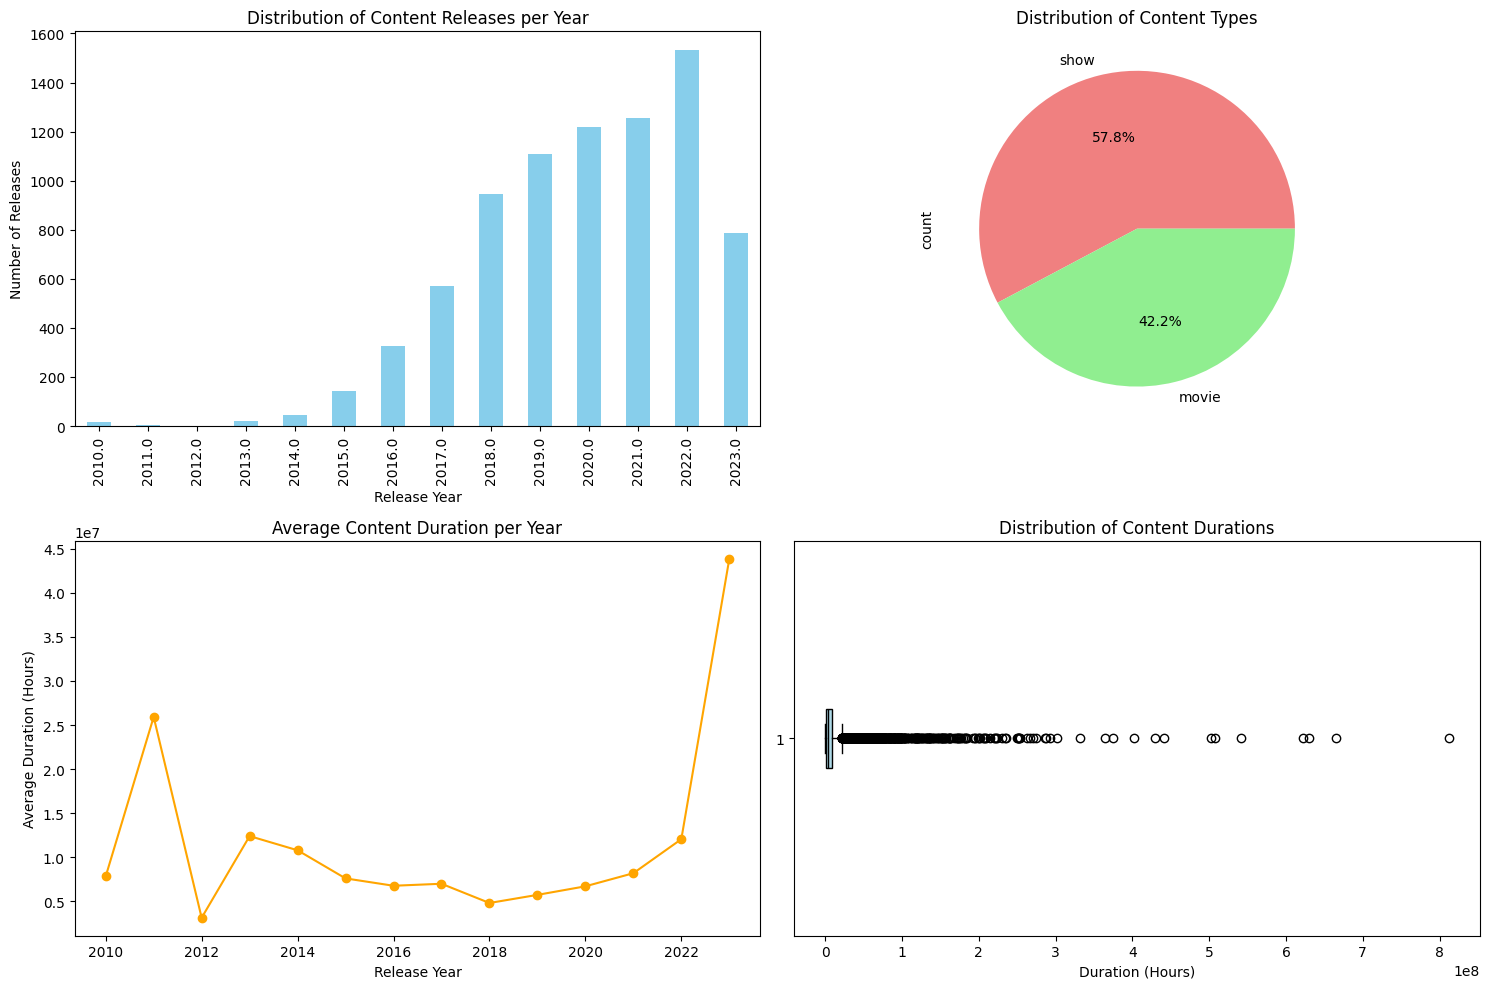

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# 1. Bar chart for content releases per year
plt.subplot(2, 2, 1)
releases_per_year.plot(kind='bar', color='skyblue')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.title('Distribution of Content Releases per Year')

# 2. Pie chart for content type distribution
plt.subplot(2, 2, 2)
content_type_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Distribution of Content Types')

# 3. Line chart for average content duration per year
plt.subplot(2, 2, 3)
average_duration_per_year.plot(kind='line', marker='o', color='orange')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (Hours)')
plt.title('Average Content Duration per Year')

# 4. Box plot for content duration distribution
plt.subplot(2, 2, 4)
plt.boxplot(df_netflix['duration'], vert=False, patch_artist=True, showfliers=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='black'))
plt.xlabel('Duration (Hours)')
plt.title('Distribution of Content Durations')

plt.tight_layout()
plt.show()

## Summary:

### 1. Q&A

No questions were posed in the provided data analysis task.


### 2. Data Analysis Key Findings

*   **Missing Data:** 67.09% of 'Release Date' values were missing and subsequently removed.  191 duplicate rows were also removed.
*   **Content Type:** More TV shows (4607) than movies (3368) were present in the dataset.
*   **Release Trends:** A significant increase in content releases occurred from 2016 onwards, with a peak in the 2021-2025 period.
*   **Duration Outliers:** The 'duration' data exhibits extreme outliers. The mean duration (11,369,000) is heavily influenced by these outliers, while the median duration (3,100,000) provides a more robust measure of central tendency.
*   **Average Duration Variation:** The average content duration per year shows significant variation, with a particularly high average in 2023.


### 3. Insights or Next Steps

*   **Investigate 2023 Duration Spike:**  Further explore the unusually high average duration in 2023 to understand the contributing factors.
*   **Refine Outlier Handling:**  Develop a strategy for handling the outliers in the 'duration' data, potentially using more robust statistical methods or capping/removing extreme values, before further analysis.
